# Real estate price

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
df = pd.read_csv('Real estate.csv')

In [4]:
df.head()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


In [5]:
df = df.drop(['No','X5 latitude','X6 longitude'], axis=1)
df.head()

,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,Y house price of unit area
0,2012.917,32.0,84.87882,10,37.9
1,2012.917,19.5,306.59470,9,42.2
2,2013.583,13.3,561.98450,5,47.3
3,2013.500,13.3,561.98450,5,54.8
4,2012.833,5.0,390.56840,5,43.1


In [6]:
df['X1 transaction date'] = df['X1 transaction date'].astype(str).str.extract(r'^(\d{4})')[0]
df.head()

,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,Y house price of unit area
0,2012,32.0,84.87882,10,37.9
1,2012,19.5,306.59470,9,42.2
2,2013,13.3,561.98450,5,47.3
3,2013,13.3,561.98450,5,54.8
4,2012,5.0,390.56840,5,43.1


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 5 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   X1 transaction date                     414 non-null    object 
 1   X2 house age                            414 non-null    float64
 2   X3 distance to the nearest MRT station  414 non-null    float64
 3   X4 number of convenience stores         414 non-null    int64  
 4   Y house price of unit area              414 non-null    float64
dtypes: float64(3), int64(1), object(1)
memory usage: 16.3+ KB


In [8]:
df['X1 transaction date'] = df['X1 transaction date'].astype(int)
df.head()

,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,Y house price of unit area
0,2012,32.0,84.87882,10,37.9
1,2012,19.5,306.59470,9,42.2
2,2013,13.3,561.98450,5,47.3
3,2013,13.3,561.98450,5,54.8
4,2012,5.0,390.56840,5,43.1


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 5 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   X1 transaction date                     414 non-null    int32  
 1   X2 house age                            414 non-null    float64
 2   X3 distance to the nearest MRT station  414 non-null    float64
 3   X4 number of convenience stores         414 non-null    int64  
 4   Y house price of unit area              414 non-null    float64
dtypes: float64(3), int32(1), int64(1)
memory usage: 14.7 KB


### Dataset Explanation

1. **X1 transaction date** (`int32`):  
   - Represents the year of the transaction, indicating when the real estate sale occurred.  
   - Example: 2012 or 2013.

2. **X2 house age** (`float64`):  
   - The age of the house in years at the time of the transaction.  
   - Example: 32.0 means the house is 32 years old.

3. **X3 distance to the nearest MRT station** (`float64`):  
   - The distance from the house to the nearest MRT station, measured in meters.  
   - Example: 84.87882 meters.

4. **X4 number of convenience stores** (`int64`):  
   - The number of convenience stores within a certain vicinity of the house.  
   - Example: 10 means there are 10 convenience stores nearby.

5. **Y house price of unit area** (`float64`):  
   - The price per unit area (e.g., per square meter) of the house during the transaction.  
   - Example: 37.9 means 37.9 currency units per square meter.


# Continue....

### Steps for Regression Analysis

#### **1. Split the Dataset**
- Split the data into **training (70%)** and **testing (30%)** subsets.
- Use the `train_test_split` function to ensure randomness in the split.
- Define:
  - **Features (X)**: `X1 transaction date`, `X2 house age`, `X3 distance to the nearest MRT station`, `X4 number of convenience stores`.
  - **Target (Y)**: `Y house price of unit area`.

#### **2. Check Correlation**
- Compute the correlation matrix to understand the relationships between features and the target variable.
- Visualize the correlation matrix using a **heatmap**:
  - Strong correlations between features and the target suggest potential predictors.
  - Identify multicollinearity (strong correlations between features), which might affect regression models.

#### **3. Apply Regression Models**

**a. Linear Regression**
1. Train a **Linear Regression** model using the training data.
2. Predict the target values using the testing data.

**b. Polynomial Regression**
1. Use `PolynomialFeatures` to generate polynomial terms for the features (e.g., degree = 2 or 3).
2. Train a **Linear Regression** model on the transformed polynomial features.
3. Predict the target values using the transformed testing data.

#### **4. Evaluate Model Performance**
- Evaluate both Linear and Polynomial Regression models using:
  1. **Mean Squared Error (MSE)**:
     - Measures the average squared difference between predicted and actual values.
     - Lower MSE indicates better performance.
  2. **R-squared (R²)**:
     - Measures how well the model explains the variability of the target variable.
     - Higher R² indicates better performance.
- Compare the results to determine which model performs better.

#### **5. Visualize Results**
- Plot **actual vs. predicted values** for both Linear and Polynomial Regression.
- For Polynomial Regression, visualize the curve fitting to see how well it models the data.


# <font color=red> 1. Split the Dataset</font>

In [29]:
from sklearn.model_selection import train_test_split as tts
from sklearn.linear_model import LinearRegression
reg1 = LinearRegression()

In [31]:
x1 = df[['X1 transaction date','X2 house age','X3 distance to the nearest MRT station','X4 number of convenience stores']] 
y1= df[['Y house price of unit area']]

In [11]:
train, test = tts(df, test_size=.30)

In [12]:
train.head()

,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,Y house price of unit area
209,2012,34.8,175.6294,8,40.9
412,2013,8.1,104.8101,5,52.5
328,2012,15.9,1497.7130,3,23.6
367,2012,15.0,1828.3190,2,20.9
174,2013,4.3,432.0385,7,45.2


In [13]:
test.head()

,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,Y house price of unit area
309,2013,30.3,1264.7300,0,19.1
155,2013,13.8,4082.0150,0,15.6
205,2013,12.8,1449.7220,3,21.4
313,2013,8.3,104.8101,5,42.8
363,2013,32.3,109.9455,10,48.0


In [14]:
df.head(6)

,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,Y house price of unit area
0,2012,32.0,84.87882,10,37.9
1,2012,19.5,306.59470,9,42.2
2,2013,13.3,561.98450,5,47.3
3,2013,13.3,561.98450,5,54.8
4,2012,5.0,390.56840,5,43.1
5,2012,7.1,2175.03000,3,32.1


In [32]:
xtrain, xtest, ytrain, ytest = tts(x1,y1, train_size=.70, random_state=42)

In [33]:
xtrain.head(3)

,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores
7,2013,20.3,287.60250,6
194,2013,15.2,3771.89500,0
19,2012,1.5,23.38284,7


In [34]:
ytrain.head(3)

,Y house price of unit area
7,46.7
194,29.3
19,47.7


In [35]:
print ("(""Xtrain.shape = ",xtrain.shape)
print ("(""Ytrain.shape = ",ytrain.shape)
print("\n")
print ("(""Xtest.shape = ",xtest.shape)
print ("(""Ytest.shape = ",xtest.shape)

(Xtrain.shape =  (289, 4)
(Ytrain.shape =  (289, 1)


(Xtest.shape =  (125, 4)
(Ytest.shape =  (125, 4)


# <font color=red>2. Check Correlation</font>

In [18]:
corr_matrix = df.corr()

In [19]:
corr_matrix

,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,Y house price of unit area
X1 transaction date,1.000000,0.049171,0.016519,-0.005586,0.081545
X2 house age,0.049171,1.000000,0.025622,0.049593,-0.210567
X3 distance to the nearest MRT station,0.016519,0.025622,1.000000,-0.602519,-0.673613
X4 number of convenience stores,-0.005586,0.049593,-0.602519,1.000000,0.571005
Y house price of unit area,0.081545,-0.210567,-0.673613,0.571005,1.000000


In [20]:
corr_matrix["Y house price of unit area"]

X1 transaction date                       0.081545
X2 house age                             -0.210567
X3 distance to the nearest MRT station   -0.673613
X4 number of convenience stores           0.571005
Y house price of unit area                1.000000
Name: Y house price of unit area, dtype: float64

### Visualize the correlation matrix using a heatmap

<Axes: >

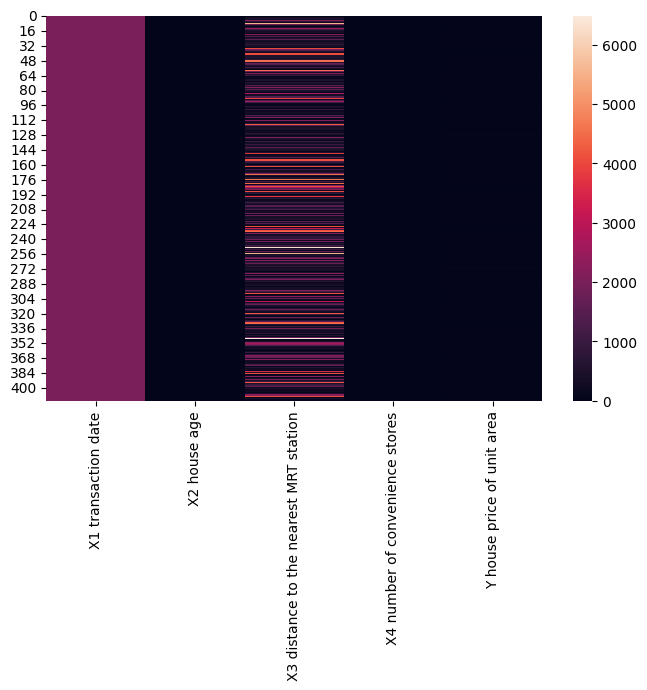

In [37]:
plt.figure(figsize=(8, 5))
sns.heatmap(df)

# <font color=red> 3. Apply Regression Models</font>
### a. Linear Regression

In [40]:
reg1 = LinearRegression()
reg1.fit(xtrain, ytrain)

LinearRegression()

In [41]:
print("Coefficients:", reg1.coef_)
print("Intercept:", reg1.intercept_)

Coefficients: [[ 2.78410294 -0.23257624 -0.00558695  1.27087806]]
Intercept: [-5560.45186776]


In [42]:
ypred = reg1.predict(xtest)

print("Predicted values: \n", ypred[:7])
print("\nActual values:\n", ytest[:7].values)

Predicted values: 
 [[50.23523426]
 [44.48165868]
 [43.68731994]
 [38.52990187]
 [28.06963547]
 [44.18373583]
 [42.2032285 ]]

Actual values:
 [[45.1]
 [42.3]
 [52.2]
 [37.3]
 [22.8]
 [36.3]
 [53. ]]


In [43]:
reg1.fit(df[['X3 distance to the nearest MRT station']] , df[['Y house price of unit area']])

LinearRegression()

In [46]:
reg1.score(df[['X3 distance to the nearest MRT station']] , df[['Y house price of unit area']])

0.45375427891826703

### b. Polynomial Regression

In [48]:
from sklearn.preprocessing import PolynomialFeatures

In [49]:
poly = PolynomialFeatures(degree=3)      # polynomial regression with degree n
x1_train_poly = poly.fit_transform(xtrain)
x1_test_poly = poly.transform(xtest)

In [51]:
reg_2 = LinearRegression()
reg_2.fit(x1_train_poly, ytrain)

LinearRegression()

In [52]:
pd.DataFrame(x1_train_poly)

,0,1,2,3,4,5,6,7,8,9,...,25,26,27,28,29,30,31,32,33,34
0,1.0,2013.0,20.3,287.60250,6.0,4052169.0,40863.9,5.789438e+05,12078.0,412.09,...,8365.427,118518.114225,2472.54,1.679119e+06,35029.98450,730.8,2.378910e+07,4.962912e+05,10353.69000,216.0
1,1.0,2013.0,15.2,3771.89500,0.0,4052169.0,30597.6,7.592825e+06,0.0,231.04,...,3511.808,871458.620800,0.00,2.162533e+08,0.00000,0.0,5.366347e+10,0.000000e+00,0.00000,0.0
2,1.0,2012.0,1.5,23.38284,7.0,4048144.0,3018.0,4.704627e+04,14084.0,2.25,...,3.375,52.611390,15.75,8.201358e+02,245.51982,73.5,1.278474e+04,3.827300e+03,1145.75916,343.0
3,1.0,2012.0,13.9,4573.77900,0.0,4048144.0,27966.8,9.202443e+06,0.0,193.21,...,2685.619,883699.840590,0.00,2.907804e+08,0.00000,0.0,9.568096e+10,0.000000e+00,0.00000,0.0
4,1.0,2012.0,15.0,1828.31900,2.0,4048144.0,30180.0,3.678578e+06,4024.0,225.00,...,3375.000,411371.775000,450.00,5.014126e+07,54849.57000,60.0,6.111614e+09,6.685501e+06,7313.27600,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284,1.0,2013.0,35.5,640.73910,3.0,4052169.0,71461.5,1.289808e+06,6039.0,1260.25,...,44738.875,807491.450775,3780.75,1.457440e+07,68238.71415,319.5,2.630533e+08,1.231640e+06,5766.65190,27.0
285,1.0,2013.0,17.2,189.51810,8.0,4052169.0,34623.6,3.814999e+05,16104.0,295.84,...,5088.448,56067.034704,2366.72,6.177743e+05,26077.69056,1100.8,6.806942e+06,2.873369e+05,12129.15840,512.0
286,1.0,2013.0,10.8,252.58220,1.0,4052169.0,21740.4,5.084480e+05,2013.0,116.64,...,1259.712,29461.187808,116.64,6.890159e+05,2727.88776,10.8,1.611418e+07,6.379777e+04,252.58220,1.0
287,1.0,2012.0,4.6,259.66070,6.0,4048144.0,9255.2,5.224373e+05,12072.0,21.16,...,97.336,5494.420412,126.96,3.101489e+05,7166.63532,165.6,1.750728e+07,4.045421e+05,9347.78520,216.0


In [ ]:
reg_poly = LinearRegression()

In [53]:
y1_pred_poly = reg_2.predict(x1_test_poly)

In [54]:
print("Predicted values:\n", y1_pred_poly[:5])
print("\nActual values:\n", ytest[:5].values)

Predicted values:
 [[55.25268103]
 [42.81787109]
 [52.77592022]
 [47.10422769]
 [22.26134891]]

Actual values:
 [[45.1]
 [42.3]
 [52.2]
 [37.3]
 [22.8]]


# <font color=red>4. Evaluate Model Performance</font>
### Mean Squared Error (MSE)

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

#### <font color=blue>Linear Regression:</font>

In [65]:

mse_linear = mean_squared_error(ytest, ypred)
print(f"  MSE for Linear Regression: {mse_linear:.4f}")


  MSE for Linear Regression: 72.8483


#### <font color=blue>Polynomial Regression:</font>

In [60]:
mse_poly = mean_squared_error(ytest, y1_pred_poly)
print(f"  MSE for Polynomial Regression:: {mse_poly:.4f}")


  MSE for Polynomial Regression:: 63.7894


### R-squared (R²):

#### <font color=blue>Linear Regression:</font>

In [62]:
r2_linear = r2_score(ytest, ypred)
print(f"  R² for Linear Regression: {r2_linear:.4f}")


  R² for Linear Regression: 0.5644


#### <font color=blue>Polynomial Regression:</font>

In [64]:
r2_poly = r2_score(ytest, y1_pred_poly)
print(f"  R² for Polynomial Regression: {r2_poly:.4f}")

  R² for Polynomial Regression: 0.6185


# <font color=red>5. Visualize Results</font>

## <font>Linear Regression:</font>

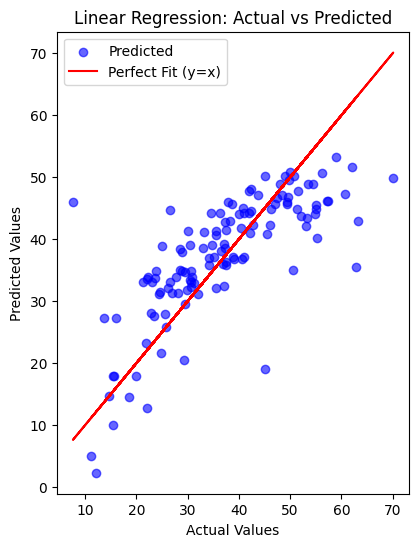

In [70]:
plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)

plt.scatter(ytest, ypred, alpha=0.6, color='blue', label="Predicted")
plt.plot(ytest, ytest, color='red', label="Perfect Fit (y=x)")
plt.title("Linear Regression: Actual vs Predicted")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.legend()

## Polynomial Regression

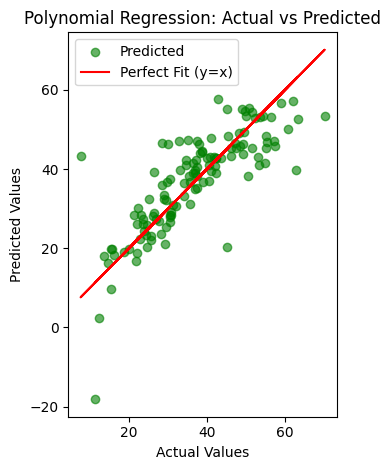

In [72]:
plt.subplot(1, 2, 2)

plt.scatter(ytest, y1_pred_poly, alpha=0.6, color='green', label="Predicted")
plt.plot(ytest, ytest, color='red', label="Perfect Fit (y=x)")
plt.title("Polynomial Regression: Actual vs Predicted")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.legend()

plt.tight_layout()
plt.show()